In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import bike_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible
from training_callback import BatchMSE

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = bike_prep()

In [6]:
layers = 5
neurons = [64, 32, 32, 16, 1]
n_cols = X_train.shape[1]
batch_size = 32
epochs = 10

Epoch 1/10
462/462 [==============================] - 0s 832us/step - loss: 28980.8086 - mse: 28980.8086 - val_loss: 12168.9033 - val_mse: 12168.9033
Epoch 2/10
462/462 [==============================] - 0s 622us/step - loss: 8992.1719 - mse: 8992.1719 - val_loss: 8138.0312 - val_mse: 8138.0312
Epoch 3/10
462/462 [==============================] - 0s 617us/step - loss: 7141.7822 - mse: 7141.7822 - val_loss: 6515.9761 - val_mse: 6515.9761
Epoch 4/10
462/462 [==============================] - 0s 607us/step - loss: 5053.6572 - mse: 5053.6572 - val_loss: 3913.1035 - val_mse: 3913.1035
Epoch 5/10
462/462 [==============================] - 0s 611us/step - loss: 3355.6262 - mse: 3355.6262 - val_loss: 2878.9087 - val_mse: 2878.9087
Epoch 6/10
462/462 [==============================] - 0s 624us/step - loss: 2806.2971 - mse: 2806.2971 - val_loss: 2552.0852 - val_mse: 2552.0852
Epoch 7/10
462/462 [==============================] - 0s 617us/step - loss: 2535.0876 - mse: 2535.0876 - val_loss: 2401.

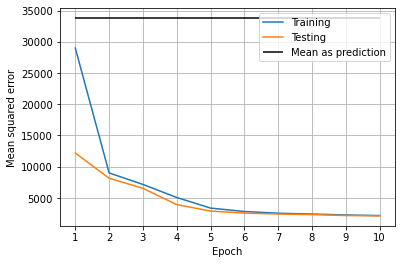

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols,
                           classification = False)
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train,
                     y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_mse(model,
            mse_mean = mean_squared_error(y_test, np.ones(shape = (len(y_test),))*np.mean(y_test)))
# nn_save(model, "../models/model_test_small.h5")

In [8]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(53, 64) dtype=float32, numpy=
 array([[ 0.03122147, -0.5726782 ,  0.06487051, ..., -0.41006082,
          0.11544479, -0.3095163 ],
        [-0.05521205, -0.18551764,  0.02875502, ..., -0.118701  ,
         -0.05087367, -0.04047558],
        [-0.3834438 ,  0.09129392,  0.18204287, ...,  0.0095254 ,
         -0.08452822,  1.168698  ],
        ...,
        [-0.09877021,  0.04546194, -0.00582157, ..., -0.12964316,
          0.28082427, -0.06433252],
        [ 0.1031141 ,  0.04453314, -0.03140611, ..., -0.15084712,
         -0.18622662, -0.47129223],
        [-0.28979626,  0.10165069,  0.25020397, ..., -0.09552792,
         -0.2016004 ,  0.18396139]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.15465833, -0.05684301,  0.07320277,  0.06729421,  0.00676181,
         0.02239126,  0.02490706, -0.10043851, -0.14509438, -0.07684173,
         0.0265313 ,  0.05662949,  0.08753247,  0.15805128,  0.01973509,
       

In [9]:
model.history.history

{'loss': [28980.80859375,
  8992.171875,
  7141.7822265625,
  5053.6572265625,
  3355.626220703125,
  2806.297119140625,
  2535.087646484375,
  2403.518310546875,
  2251.83203125,
  2160.8583984375],
 'mse': [28980.80859375,
  8992.171875,
  7141.7822265625,
  5053.6572265625,
  3355.626220703125,
  2806.297119140625,
  2535.087646484375,
  2403.518310546875,
  2251.83203125,
  2160.8583984375],
 'val_loss': [12168.9033203125,
  8138.03125,
  6515.97607421875,
  3913.103515625,
  2878.90869140625,
  2552.085205078125,
  2401.681396484375,
  2312.374755859375,
  2163.51123046875,
  2102.10791015625],
 'val_mse': [12168.9033203125,
  8138.03125,
  6515.97607421875,
  3913.103515625,
  2878.90869140625,
  2552.085205078125,
  2401.681396484375,
  2312.374755859375,
  2163.51123046875,
  2102.10791015625]}

In [10]:
model.evaluate(X_test, y_test)

82/82 [==============================] - 0s 415us/step - loss: 2102.1079 - mse: 2102.1079


[2102.10791015625, 2102.10791015625]

In [11]:
weights = model.get_weights()
print(weights)

[array([[ 0.03122147, -0.5726782 ,  0.06487051, ..., -0.41006082,
         0.11544479, -0.3095163 ],
       [-0.05521205, -0.18551764,  0.02875502, ..., -0.118701  ,
        -0.05087367, -0.04047558],
       [-0.3834438 ,  0.09129392,  0.18204287, ...,  0.0095254 ,
        -0.08452822,  1.168698  ],
       ...,
       [-0.09877021,  0.04546194, -0.00582157, ..., -0.12964316,
         0.28082427, -0.06433252],
       [ 0.1031141 ,  0.04453314, -0.03140611, ..., -0.15084712,
        -0.18622662, -0.47129223],
       [-0.28979626,  0.10165069,  0.25020397, ..., -0.09552792,
        -0.2016004 ,  0.18396139]], dtype=float32), array([ 0.15465833, -0.05684301,  0.07320277,  0.06729421,  0.00676181,
        0.02239126,  0.02490706, -0.10043851, -0.14509438, -0.07684173,
        0.0265313 ,  0.05662949,  0.08753247,  0.15805128,  0.01973509,
        0.1044644 , -0.09332507,  0.04778977, -0.06435905,  0.02356812,
       -0.18591322, -0.04742759, -0.32157207, -0.0880465 , -0.08586688,
        0.

In [12]:
model.predict(X_test)

array([[250.35971 ],
       [121.30139 ],
       [ 98.700035],
       ...,
       [ 18.518784],
       [ 48.8559  ],
       [ 12.630451]], dtype=float32)

In [13]:
y_true, y_pred = nn_mse_pred_true(model, X_test, y_test, print_comp = True)

Prediction: 250.35971069335938, Actual: 254
Prediction: 121.3013916015625, Actual: 114
Prediction: 98.70003509521484, Actual: 70
Prediction: 156.99267578125, Actual: 148
Prediction: 175.2736358642578, Actual: 163
Prediction: 464.9516906738281, Actual: 578
Prediction: 465.0634765625, Actual: 573
Prediction: 19.576623916625977, Actual: 32
Prediction: 309.88421630859375, Actual: 297
Prediction: 114.36531829833984, Actual: 123
Prediction: 131.54788208007812, Actual: 92
Prediction: 449.0473327636719, Actual: 522
Prediction: 291.2594299316406, Actual: 386
Prediction: 366.10687255859375, Actual: 370
Prediction: 173.80050659179688, Actual: 126
Prediction: 306.3073425292969, Actual: 296
Prediction: 120.90937042236328, Actual: 89
Prediction: 17.36321449279785, Actual: 23
Prediction: 211.0257568359375, Actual: 331
Prediction: 118.91033172607422, Actual: 170
Prediction: 219.00555419921875, Actual: 291
Prediction: 171.64166259765625, Actual: 187
Prediction: 11.436976432800293, Actual: 14
Prediction

In [14]:
true_mse = model.evaluate(X_test, y_test)[1]
print(true_mse)
print(model.predict(X_test[:3]))

shape_0 = model.get_weights()[0].shape
print(shape_0)

old_first_weights = model.get_weights()[0]

# first_weights = [np.random.normal(size = shape_0)]
first_weights = [model.get_weights()[0]*0.75]
print(first_weights)
print(first_weights[0].shape)

all_weights = first_weights + model.get_weights()[1:]
# print(all_weights)

model.set_weights(all_weights)

fake_mse = model.evaluate(X_test, y_test)[1]
print(fake_mse)
print(model.predict(X_test[:3]))

old_weights = [old_first_weights] + model.get_weights()[1:]

model.set_weights(old_weights)

old_true_mse = model.evaluate(X_test, y_test)[1]
print(old_true_mse)
print(model.predict(X_test[:3]))

82/82 [==============================] - 0s 439us/step - loss: 2102.1079 - mse: 2102.1079
2102.10791015625
[[250.35971]
 [121.3014 ]
 [ 98.70005]]
(53, 64)
[array([[ 0.0234161 , -0.42950866,  0.04865289, ..., -0.3075456 ,
         0.0865836 , -0.23213723],
       [-0.04140903, -0.13913822,  0.02156627, ..., -0.08902575,
        -0.03815525, -0.03035668],
       [-0.28758284,  0.06847044,  0.13653216, ...,  0.00714405,
        -0.06339617,  0.8765235 ],
       ...,
       [-0.07407766,  0.03409645, -0.00436618, ..., -0.09723237,
         0.2106182 , -0.04824939],
       [ 0.07733557,  0.03339985, -0.02355458, ..., -0.11313534,
        -0.13966997, -0.35346916],
       [-0.2173472 ,  0.07623801,  0.18765298, ..., -0.07164594,
        -0.1512003 ,  0.13797104]], dtype=float32)]
(53, 64)
82/82 [==============================] - 0s 415us/step - loss: 7093.0542 - mse: 7093.0542
7093.05419921875
[[198.72987]
 [ 98.3372 ]
 [ 87.55597]]
82/82 [==============================] - 0s 403us/step - l

Epoch 1/2
30/30 [==============================] - 5s 176ms/step - loss: 67967.3516 - mse: 67967.3516 - val_loss: 68986.2969 - val_mse: 68986.2969
Epoch 2/2
11/30 [==========>...................] - ETA: 3s - loss: 70413.4062 - mse: 70413.4062WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.176160). Check your callbacks.


30/30 [==============================] - 5s 174ms/step - loss: 69158.5625 - mse: 69158.5625 - val_loss: 68986.2969 - val_mse: 68986.2969
Overall calculation took 11.151114702224731 seconds.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3456      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,137
Trainable params: 7,137
Non-trainable params

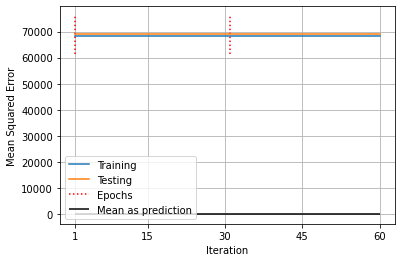

In [15]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = "adam")
train_mse = BatchMSE((X_train,
                      y_train))
test_mse = BatchMSE((X_test,
                     y_test))
early_stop_mse = tensorflow.python.keras.callbacks.EarlyStopping(monitor = "val_mse",
                                                                 min_delta = 1,
                                                                 patience = 1)
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train,
                     y_train = y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = 500,                            # change to batch_size
                     epochs = 2,                                  # change to epochs
                     callbacks = [train_mse, test_mse, early_stop_mse]
                     )
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
iteration_list = []
for epoch in range(2):                                             # change to epochs
    for b in range(int(np.ceil(len(X_train) / 500))):              # change 500 to batch_size                        
        iteration_list.append("Epoch: {}, Batch: {}.".format(epoch+1, b+1))
nn_plot_iter_mse(train_mse.mse,
                 test_mse.mse,
                 iteration_list,
                 mse_mean = 1 / len(y_train))